In [29]:
# load in the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# load in the data in use
data = pd.read_csv(filepath_or_buffer= "~/Desktop/datasets/vending_machine_sales.csv")
data.shape

(9617, 18)

In [ ]:
# I am going to try to figure out the unique values of each variables (besides NAs)
# pick out the columns with only one unique value and remove those (since there's no variability within that variable)

initial_list= []
for col in data.columns:
    print(data[col].dropna().unique())
    if (len(data[col].dropna().unique())==1) :
        initial_list.append(col)
    
initial_list # list seems to be empty, there is no column that contains only one-value


In [15]:
# manually cleaning the data and removing the columns that are not useful based on domain knowledge

# 1. want to filter out 'unlinked' status transactions
# since we're only interested in processed transactions
data = data[data['Status'] == 'Processed']

# now we can remove the status , we can also remove device ID because 
# it represents the same info as the column 'Machine'
# also wanna remove 'Transaction' because it is a reference number, not interested in a particular transaction
# for our purposes, we're trying to get the info of the retail items sales rather than the particular transaction
# so we're removing all transaction related identifier 
# removing RCoil, MCoil since it is not within our purposes
remove_cols=['Status', 'Device ID', 'Transaction', 'RCoil', 'MCoil', 'MQty', 'MPrice','TransTotal']
data= data.drop(columns=remove_cols)


In [18]:
data.shape
data.head()

,Location,Machine,Product,Category,TransDate,Type,RPrice,RQty,LineTotal,Prcd Date
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,1/1/2022,Credit,3.5,1,3.5,1/1/2022
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,1/1/2022,Credit,3.5,1,3.5,1/1/2022
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,1/1/2022,Credit,1.5,1,1.5,1/1/2022
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,1/1/2022,Credit,1.5,1,1.5,1/1/2022
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,1/1/2022,Credit,3.5,1,3.5,1/1/2022


In [71]:
# first task we're interested in - quantities sold and sales total of each category

def calculated_total_sales(group):
    total_profit=(group['RQty']*group['RPrice']).sum()
    return pd.Series({'total_profit' : total_profit})

result2=data.groupby(by='Category').apply(calculated_total_sales).reset_index()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

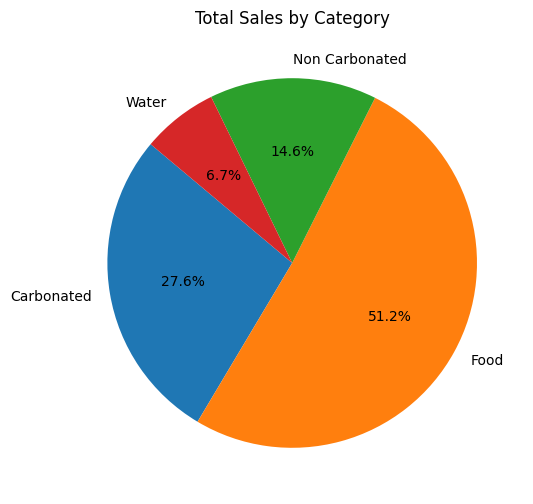

In [36]:
plt.figure(figsize=(8, 6))
plt.pie(result2['total_profit'], labels=result2['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Category')
plt.show()


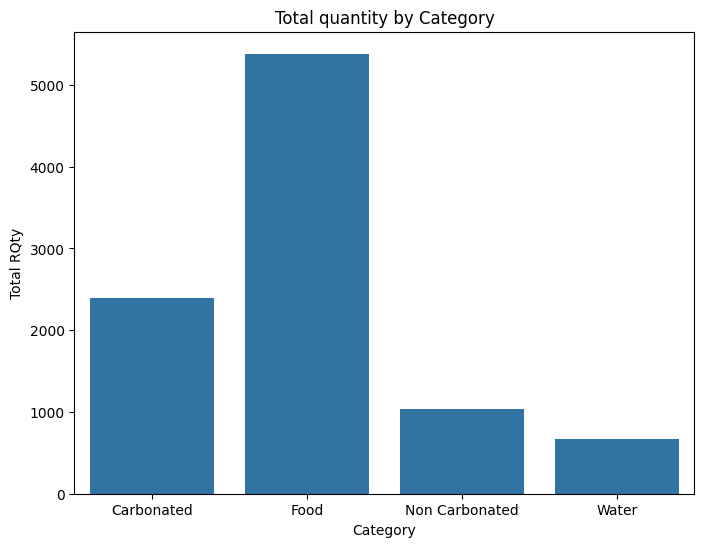

In [75]:
result1 = data.groupby(by='Category').agg({'RQty': 'sum'}).reset_index()
result1
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='RQty', data=result1)
plt.title('Total quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total RQty')
plt.show()

,Category,RQty
0,Carbonated,2397
1,Food,5381
2,Non Carbonated,1031
3,Water,672
